In [1]:
from SSWM import SSWM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#N - number of genes, M - number of traits, K - pleiotropy coefficient (number of literals in clause)
#h1 - treshold, T_stop1 - number of evolution iterations, N_monte - number of experiments
N, M, K, h1, T_stop1, N_monte = 20, 10, 5, 1.2, 500, 10

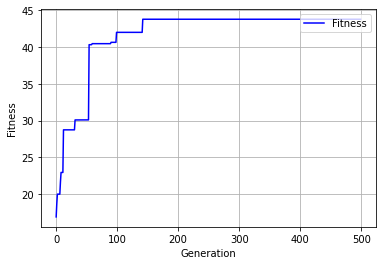

Max. fitness found =  43.7889030161039


In [3]:
#Test run for low a = M/N
evolution = SSWM(N, M, K, T_stop = T_stop1, h = h1,  pleiotropy = "poisson", sigma = "logistic")
evolution.evolve()
evolution.show(False) #Fitness graph
print("Max. fitness found = ", evolution.getFmax())

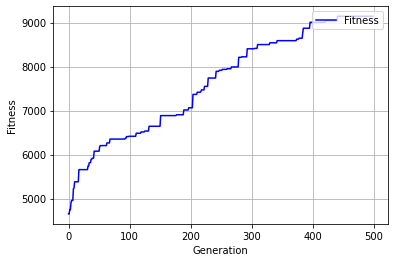

Max. fitness found =  9142.525763724498


In [4]:
#Test run for high a = M/N
N, M, K, h1 = 100, 150, 30, 1.2
evolution = SSWM(N, M, K, T_stop = T_stop1, h = h1,  pleiotropy = "poisson", sigma = "logistic")
evolution.evolve()
evolution.show(False) #Fitness graph
print("Max. fitness found = ", evolution.getFmax())

In [5]:
#General statement of problem
#There is a ration a = M/N between number of traits and genes, after whcih 
#full adaptation is impossible or its speed is rapidly slowing down

In [18]:
alpha_history = [] 
fitness_avg_history = []
evol_rate_history = []

In [19]:
N, K, T_stop = 100, 10, 500 

In [20]:
for alpha in [x * 0.3 for x in range(1, 12)]: # alpha: [0.3, 3.6]
    fit_monte = 0
    rate_monte = 0
    for i in range(N_monte):
        evolution2 = SSWM(N, round(N*alpha), K, T_stop = T_stop1, h = h1, pleiotropy = "poisson", sigma = "logistic")
        evolution2.evolve()
        fit_monte += evolution2.getFmax()
        rate_monte += evolution2.F_max/evolution2.getFmax()
    mean_fitness = fit_monte/N_monte
    fitness_avg_history.append(mean_fitness)
    alpha_history.append(alpha)
    evol_rate_history.append(rate_monte/N_monte)
    print("Status: Alpha =", alpha, ", Mean max fitnes found =", mean_fitness)


Status: Alpha = 0.3 , Mean max fitnes found = 716.0942637355236
Status: Alpha = 0.6 , Mean max fitnes found = 1742.0468509877378
Status: Alpha = 0.8999999999999999 , Mean max fitnes found = 3062.821176919003
Status: Alpha = 1.2 , Mean max fitnes found = 4468.650631281458
Status: Alpha = 1.5 , Mean max fitnes found = 5802.815233370513
Status: Alpha = 1.7999999999999998 , Mean max fitnes found = 6839.577418870549
Status: Alpha = 2.1 , Mean max fitnes found = 8793.483582862542
Status: Alpha = 2.4 , Mean max fitnes found = 10511.406300856579
Status: Alpha = 2.6999999999999997 , Mean max fitnes found = 12614.779002287649
Status: Alpha = 3.0 , Mean max fitnes found = 14881.25440744913
Status: Alpha = 3.3 , Mean max fitnes found = 16772.414604934642


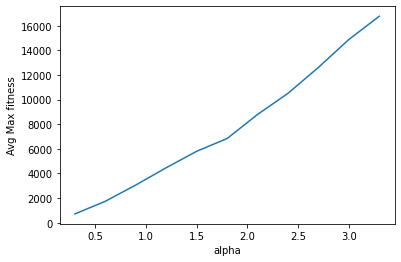

In [21]:
plt.xlabel("alpha")
plt.ylabel("Avg Max fitness")
plt.plot(alpha_history, fitness_avg_history)

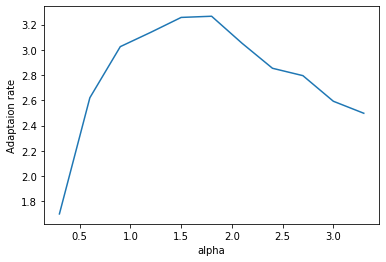

In [22]:
plt.xlabel("alpha")
plt.ylabel("Adaptaion rate")
plt.plot(alpha_history, evol_rate_history)

In [23]:
#ACHTUNG !!!
#For calculating adapation rate as f_max/f_theoretical_max i used my formula calculating theoretical fitness, so it actually
#could be wrong :/

In [20]:
#Let p_mut = gamma/N, where gamma - paramter, N - number of genes
#Here we will try to find out the dependence of the adaptation rate on the gamma parameter

In [41]:
fitness = []
gamma = []
N, M, K = 15, 30, 8

In [42]:
evolution = SSWM(N, M, K, T_stop = T_stop1, h = h1,  pleitropy = "fair", sigma = "logistic")
evolution.evolve()

In [43]:
W2, B2, C2, genotype2 = evolution.getWBCGenotype() #Fix some input params

In [44]:
for g in [x*0.1 for x in range(1, N*10)]:
    f_monte = 0
    for i in range(N_monte):
        evolution2 = SSWM(N, M, K, T_stop = T_stop1, p_mut = g/N, W=W2.copy(), B=B2.copy(), C=C2.copy(), genotype = genotype2.copy())
        evolution2.evolve()
        f_monte += evolution2.getFmax()
    f_avg = f_monte/N_monte
    gamma.append(g)
    fitness.append(f_avg)

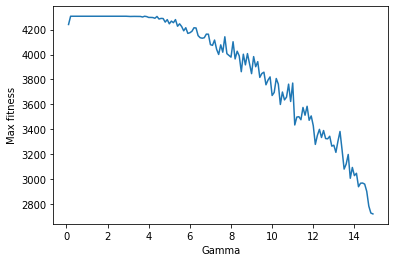

In [45]:
plt.xlabel("Gamma")
plt.ylabel("Max fitness")
plt.plot(gamma, fitness)

In [47]:
print("Optimal gamma for this SSWM model =", np.argmax(fitness)+1, "F_max =", max(fitness))

Optimal gamma for this SSWM model = 2 F_max = 4307.5
